<a href="https://colab.research.google.com/github/moonStereoCode/public-BC/blob/main/CNN_for_Breast_Cancer_Classification_Complete.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Set Up

***PREPARATION***

In [ ]:
#import dataset, mounting drive
from google.colab import drive
drive.mount("/content/gdrive")

In [ ]:
#download & install lib for preprocessing
!pip install Pillow
from PIL import Image
import os, sys
import cv2
import numpy as np
import tensorflow as tf


# Preprocessing

***RESIZE***

In [ ]:
#fetching image from Googledrive folder & resize it (cancer dataset)
path_cancer = r'/content/gdrive/My Drive/SKRIPSI/Dataset/cancer_dataset/'
path_cancer_target =  '/content/gdrive/My Drive/SKRIPSI/Dataset/Scaling/cancer_dataset/'

def resize_cancer():
  for filename in os.listdir(path_cancer):
    img = Image.open(os.path.join(path_cancer,filename))
    img = img.resize((200,300), Image.ANTIALIAS)
    img.save(path_cancer_target+"Resized_"+filename)

In [ ]:
resize_cancer()

In [ ]:
#fetching image from Googledrive folder & resize it (normal dataset)
path_normal = r'/content/gdrive/My Drive/SKRIPSI/Dataset/normal_dataset/'
path_normal_target =  '/content/gdrive/My Drive/SKRIPSI/Dataset/Scaling/normal_dataset/'

def resize_normal():
  for filename in os.listdir(path_normal):
    img = Image.open(os.path.join(path_normal,filename))
    img = img.resize((200,300), Image.ANTIALIAS)
    img.save(path_normal_target+"Resized_"+filename)

In [ ]:
resize_normal()

***CLAHE***

In [ ]:
#CLAHE Cancer Dataset
folder_cancer = '/content/gdrive/My Drive/SKRIPSI/Dataset/Scaling/cancer_dataset/'

def clahe_cancer():
  for filename in os.listdir(folder_cancer):
    img = cv2.imread(os.path.join(folder_cancer, filename), 0)
    clahe = cv2.createCLAHE(clipLimit =3.0, tileGridSize=(8,8))
    cl_img = clahe.apply(img)
    cv2.imwrite(os.path.join('/content/gdrive/My Drive/SKRIPSI/Dataset/CLAHE/cancer_dataset/', "CLAHE_"+filename),cl_img)

In [ ]:
clahe_cancer()

In [ ]:
#CLAHE normal Dataset
folder_normal = '/content/gdrive/My Drive/SKRIPSI/Dataset/Scaling/normal_dataset/'

def clahe_normal():
  for filename in os.listdir(folder_normal):
    img = cv2.imread(os.path.join(folder_normal, filename), 0)
    clahe = cv2.createCLAHE(clipLimit =3.0, tileGridSize=(8,8))
    cl_img = clahe.apply(img)
    cv2.imwrite(os.path.join('/content/gdrive/My Drive/SKRIPSI/Dataset/CLAHE/normal_dataset/', "CLAHE_"+filename),cl_img)

In [ ]:
clahe_normal()

***THRESHOLDING***

In [ ]:
#THRESHOLDING for CANCER Dataset
dir_cancer = '/content/gdrive/My Drive/SKRIPSI/Dataset/CLAHE/cancer_dataset/'

def threshold_cancer():
  for filename in os.listdir(dir_cancer):
    img = cv2.imread(os.path.join(dir_cancer, filename))
    GrayImage=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    ret,thresh=cv2.threshold(GrayImage,85,255,cv2.THRESH_BINARY_INV)
    cv2.imwrite(os.path.join('/content/gdrive/My Drive/SKRIPSI/Dataset/Thresholded/cancer_dataset/', "THRESHOLD_ " + filename),thresh)

In [ ]:
threshold_cancer()

In [ ]:
#THRESHOLDING for NORMAL Dataset
dir_normal = '/content/gdrive/My Drive/SKRIPSI/Dataset/CLAHE/normal_dataset/'

def threshold_normal():
  for filename in os.listdir(dir_normal):
    img = cv2.imread(os.path.join(dir_normal, filename))
    GrayImage=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    ret,thresh=cv2.threshold(GrayImage,85,255,cv2.THRESH_BINARY_INV)
    cv2.imwrite(os.path.join('/content/gdrive/My Drive/SKRIPSI/Dataset/Thresholded/normal_dataset/', "THRESHOLD_ " + filename),thresh)

In [ ]:
threshold_normal()

# Classification

In [ ]:
# SET UP : download and install lib for CNN Models
!pip install split-folders tqdm
import splitfolders
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D 
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import image
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Building Model
model1 = tf.keras.models.Sequential([
  #layer convolutional 1
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(200, 300, 3 )),
  tf.keras.layers.MaxPooling2D(2,2),

  #layer convolutional 2
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),

  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation="softmax")
])

model1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 298, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 149, 64)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 147, 64)       36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 73, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 224256)            0         
                                                                 
 dense (Dense)               (None, 128)               2

In [ ]:
# Building Model
model1_1 = tf.keras.models.Sequential([
  #layer convolutional 1
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(200, 300, 3 )),
  tf.keras.layers.MaxPooling2D(2,2),

  #layer convolutional 2
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),

  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation="softmax")
])

model1_1.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model1_1.summary()

In [ ]:
model2 = tf.keras.models.Sequential([
  #layer convolutional 1
  tf.keras.layers.Conv2D(64, (3,3), activation='sigmoid', input_shape=(200, 300, 3)),
  tf.keras.layers.MaxPooling2D(2,2),

  #layer convolutional 2
  tf.keras.layers.Conv2D(64, (3,3), activation='sigmoid', input_shape=(200, 300, 3)),
  tf.keras.layers.MaxPooling2D(2,2),

  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation="softmax")
])
model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model2.summary()

In [ ]:
# Building Model
model3 = tf.keras.models.Sequential([
  #layer convolutional 1
  tf.keras.layers.Conv2D(64, (2,2), activation='relu', padding="same", input_shape=(200, 300, 3 )),
  tf.keras.layers.MaxPooling2D(2,2),

  #layer convolutional 2
  #tf.keras.layers.Conv2D(64, (2,2), activation='relu'),
  #tf.keras.layers.MaxPooling2D(2,2),

  #layer convolutional 3
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),

  #layer convolutional 3
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),

  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(1, activation="softmax", )
])

model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model3.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 200, 300, 64)      832       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 100, 150, 64)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 98, 148, 64)       36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 49, 74, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 47, 72, 64)        36928     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 23, 36, 64)      

In [ ]:
model4 = tf.keras.models.Sequential([
  #layer convolutional 1
  tf.keras.layers.Conv2D(64, (3,3), activation='tanh', input_shape=(200, 300, 3 )),
  tf.keras.layers.MaxPooling2D(2,2),

  #layer convolutional 2
  tf.keras.layers.Conv2D(64, (3,3), activation='tanh'),
  tf.keras.layers.MaxPooling2D(2,2),

  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation="softmax")
])

model4.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model4.summary()

# ***CLASSIFICATION CASE 1***

***CLASSIFICATION CASE 1***

Classification in raw image



In [ ]:
# Split Data to training and validation 
input_folder='/content/gdrive/My Drive/SKRIPSI/Dataset/root/'
output_folder='/content/gdrive/My Drive/SKRIPSI/Dataset/cnn_1'
splitfolders.ratio(input_folder, output=output_folder, seed=133, ratio=(.8, .2), group_prefix=None) 

Copying files: 1200 files [00:24, 48.78 files/s]


In [ ]:
# Fitting the data to the model
train_datagen = ImageDataGenerator(rescale= 1./255, shear_range= 0.2, zoom_range= 0.2, horizontal_flip= True)
test_datagen = ImageDataGenerator(rescale= 1./255)

training_set = train_datagen.flow_from_directory('/content/gdrive/My Drive/SKRIPSI/Dataset/cnn_1/train/',
target_size = (200,300),
batch_size = 32,
class_mode = 'binary')

test_set = test_datagen.flow_from_directory('/content/gdrive/My Drive/SKRIPSI/Dataset/cnn_1/val/',
target_size = (200,300),
batch_size = 32,
class_mode = 'binary')

Found 960 images belonging to 2 classes.
Found 240 images belonging to 2 classes.


In [ ]:
model1.fit(training_set, epochs=40, batch_size=8, validation_data = test_set)
#model1.save("/content/gdrive/My Drive/SKRIPSI/model1_raw.h5")

In [ ]:
model1_1.fit(training_set, epochs=20, batch_size=8, validation_data = test_set)

In [ ]:
model2.fit(training_set, epochs=20, batch_size=8, validation_data = test_set)

In [ ]:
model3.fit(training_set, epochs=30, batch_size=8, validation_data = test_set)
model3.save("/content/gdrive/My Drive/SKRIPSI/model3_raw.h5")

# ***CLASSIFICATION CASE 2***

***CLASSIFICATION CASE 2***

Classification after images has been preprocessed (Final Prepocessing / Thresholding)


In [ ]:
#SPLIT DATA
input_folder='/content/gdrive/My Drive/SKRIPSI/Dataset/CLAHE/'
output_folder='/content/gdrive/My Drive/SKRIPSI/Dataset/cnn_3' #cnn_2 save splitted final preprocessing datas
splitfolders.ratio(input_folder, output=output_folder, seed=133, ratio=(.8, .2), group_prefix=None) 

Copying files: 1200 files [00:27, 43.55 files/s]


In [ ]:
# Fitting the data to the model 
train_datagen = ImageDataGenerator(rescale= 1./255, shear_range= 0.2, zoom_range= 0.2, horizontal_flip = "true", vertical_flip = "true")
test_datagen = ImageDataGenerator(rescale= 1./255)

training_set_m2 = train_datagen.flow_from_directory('/content/gdrive/My Drive/SKRIPSI/Dataset/cnn_3/train',
target_size = (200,300),
batch_size = 32,
class_mode = 'binary')

test_set_m2 = test_datagen.flow_from_directory('/content/gdrive/My Drive/SKRIPSI/Dataset/cnn_3/val',
target_size = (200,300),
batch_size = 32,
class_mode = 'binary')

Found 960 images belonging to 2 classes.
Found 240 images belonging to 2 classes.


In [ ]:
# Fit the data to the model1
history = model1.fit(training_set_m2, epochs=30, batch_size=8, validation_data = test_set_m2)
model1.save("/content/gdrive/My Drive/SKRIPSI/model1_CLAHE.h5")

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model1.evaluate(test_set_m2, verbose=2)

In [ ]:
model2.fit(training_set_m2, epochs=20, batch_size=8, validation_data = test_set_m2)

In [ ]:
history = model3.fit(training_set_m2, epochs=30, batch_size=32, validation_data = test_set_m2)
model3.save("/content/gdrive/My Drive/SKRIPSI/model1_CLAHE.h5")

Epoch 1/30
30/30 [==============================] - 140s 5s/step - loss: 0.6384 - accuracy: 0.5000 - val_loss: 0.5708 - val_accuracy: 0.5000
Epoch 2/30
30/30 [==============================] - 140s 5s/step - loss: 0.5323 - accuracy: 0.5000 - val_loss: 0.7037 - val_accuracy: 0.5000
Epoch 3/30
30/30 [==============================] - 138s 5s/step - loss: 0.5527 - accuracy: 0.5000 - val_loss: 0.4445 - val_accuracy: 0.5000
Epoch 4/30
30/30 [==============================] - ETA: 0s - loss: 0.4972 - accuracy: 0.5000

KeyboardInterrupt: ignored

In [ ]:
import matplotlib.pyplot as plt
def accuracy_graphic():
  plt.plot(history.history['accuracy'], label='train_accuracy')
  plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
  plt.title('Accuracy Curves')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.ylim([0.0, 1])
  plt.legend(loc='lower right')

def loss_graphic():
  plt.plot(history.history['loss'], label='train_loss')
  plt.plot(history.history['val_loss'], label = 'val_loss')
  plt.title('Loss Curves')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.ylim([0.0, 1])
  plt.legend(loc='lower right')

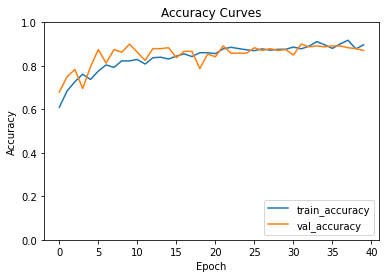

In [ ]:
accuracy_graphic()


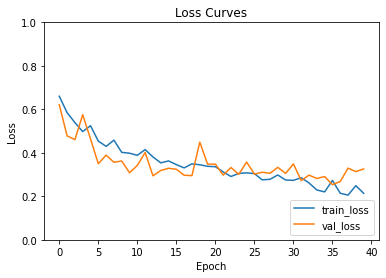

In [ ]:
loss_graphic()

# ***TESTING THE DATA***

In [ ]:
import os
import tensorflow as tf
from tensorflow.python.keras.models import Sequential, load_model
from tensorflow.python.keras.layers import Conv2D
from tensorflow.python.keras.layers import MaxPooling2D
from tensorflow.python.keras.layers import Flatten
from tensorflow.python.keras.layers import Dense
import matplotlib.image as mpimg
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tensorflow.python.keras.preprocessing import image
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator

# *Case 1*

In [ ]:
# Initialising the CNN
file_loc = ("/content/gdrive/My Drive/SKRIPSI/model3_raw.h5")
classifier = load_model(file_loc)
classifier.summary()
folder = "/content/gdrive/My Drive/SKRIPSI/Datatest/raw_image/cancer_datatest/"
normal = 0
cancer = 0

for filename in os.listdir(folder):
  img_pred = image.load_img(os.path.join(folder,filename), target_size = (200, 300))
  img_pred = image.img_to_array(img_pred)
  img_pred = np.expand_dims(img_pred, axis = 0)
  rslt = classifier.predict(img_pred)
 
    #ind = training_set.class_indices
 
  if rslt[0][0] == 1:
    prediction = "Normal"
    normal+=1
  else:
    prediction = "Cancer"
    cancer+=1
  print(rslt, " = ", prediction)
 
print('Normal : ', normal)
print('Cancer : ', cancer)

In [ ]:
# Initialising the CNN
file_loc = ("/content/gdrive/My Drive/SKRIPSI/model3_raw.h5")
classifier = load_model(file_loc)
classifier.summary()
folder = "/content/gdrive/My Drive/SKRIPSI/Datatest/raw_image/normal_datatest/"
normal = 0
cancer = 0

for filename in os.listdir(folder):
  img_pred = image.load_img(os.path.join(folder,filename), target_size = (200, 300))
  img_pred = image.img_to_array(img_pred)
  img_pred = np.expand_dims(img_pred, axis = 0)
  rslt = classifier.predict(img_pred)
 
    #ind = training_set.class_indices
 
  if rslt[0][0] == 1:
    prediction = "Normal"
    normal+=1
  else:
    prediction = "Cancer"
    cancer+=1
  print(rslt, " = ", prediction)
 
print('Normal : ', normal)
print('Cancer : ', cancer)


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 199, 299, 128)     1664      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 99, 149, 128)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 97, 147, 64)       73792     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 73, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 224256)            0         
_________________________________________________________________
dense (Dense)                (None, 128)               28704896  
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

# *Case 2*

In [ ]:
file_loc = ('/content/gdrive/My Drive/SKRIPSI/model3_CLAHE1_2.h5')
classifier = load_model(file_loc)
classifier.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_26 (Conv2D)           (None, 200, 300, 64)      832       
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 100, 150, 64)      0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 98, 148, 64)       36928     
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 49, 74, 64)        0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 47, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 23, 36, 64)        0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 52992)            

In [ ]:
# Initialising the CNN
file_loc = ('/content/gdrive/My Drive/SKRIPSI/model1_CLAHE.h5')
classifier = load_model(file_loc)
classifier.summary()
folder = '/content/gdrive/My Drive/SKRIPSI/Datatest/processed_image/clahe/cancer_clahe/'
normal = 0
cancer = 0

for filename in os.listdir(folder):
  img_pred = image.load_img(os.path.join(folder,filename), target_size = (200, 300))
  img_pred = image.img_to_array(img_pred)
  img_pred = np.expand_dims(img_pred, axis = 0)
  rslt = classifier.predict(img_pred)
 
    #ind = training_set.class_indices
 
  if rslt[0][0] == 1:
    prediction = "Normal"
    normal+=1
  else:
    prediction = "Cancer"
    cancer+=1
  print(filename, " ", rslt, " = ", prediction)
 
print('Normal : ', normal)
print('Cancer : ', cancer)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 198, 298, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 99, 149, 64)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 97, 147, 64)       36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 73, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 224256)            0         
_________________________________________________________________
dense (Dense)                (None, 128)               28704896  
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [ ]:
# Initialising the CNN
file_loc = ('/content/gdrive/My Drive/SKRIPSI/model1_CLAHE.h5')
classifier = load_model(file_loc)
classifier.summary()
folder = '/content/gdrive/My Drive/SKRIPSI/Datatest/processed_image/clahe/normal_clahe/'
normal = 0
cancer = 0

for filename in os.listdir(folder):
  img_pred = image.load_img(os.path.join(folder,filename), target_size = (200, 300))
  img_pred = image.img_to_array(img_pred)
  img_pred = np.expand_dims(img_pred, axis = 0)
  rslt = classifier.predict(img_pred)
 
    #ind = training_set.class_indices
 
  if rslt[0][0] == 1:
    prediction = "Normal"
    normal+=1
  else:
    prediction = "Cancer"
    cancer+=1
  print(rslt, " = ", prediction)
 
print('Normal : ', normal)
print('Cancer : ', cancer)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 198, 298, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 99, 149, 64)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 97, 147, 64)       36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 73, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 224256)            0         
_________________________________________________________________
dense (Dense)                (None, 128)               28704896  
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

# Fail code

In [ ]:
# Building Model 1
classifier = Sequential()
classifier.add(Conv2D(32, ( 3, 3 ), input_shape = (200, 300, 3), activation= 'relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Flatten())
classifier.add(Dense(units=128, activation='relu'))
classifier.add(Dense(units=1, activation='sigmoid'))
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy '])

In [ ]:
# Fitting Images with CNN
train_datagen = ImageDataGenerator(rescale= 1./255, shear_range= 0.2, zoom_range= 0.2, horizontal_flip= True)
test_datagen = ImageDataGenerator(rescale= 1./255)

training_set = train_datagen.flow_from_directory('/content/gdrive/My Drive/SKRIPSI/Dataset/cnn_1/train',
target_size = (200,300),
batch_size = 32,
class_mode = 'binary')

test_set = test_datagen.flow_from_directory('/content/gdrive/My Drive/SKRIPSI/Dataset/cnn_1/val',
target_size = (200,300),
batch_size = 32,
class_mode = 'binary')

#classifier.fit(
#    training_set,
#    batch_size = 64,
#    epochs = 10,
#    steps_per_epoch = 80,
#    validation_data = test_set
    #validation_steps=46
#)

classifier.fit(
    training_set,
    #steps_per_epoch = int(600/32),
    epochs = 10,
    validation_data = test_set
    #validation_steps = int(120/32)
)